In [2]:
import matplotlib.pyplot as plt
from __future__ import division
from sympy import *
from sympy.plotting import plot
a, b, c, f, t, p = symbols('a b c f t p', real=True)
init_printing()

In [3]:
def fft(signal):
    ft = integrate(hermite*exp(-2*I*pi*f*t),(t,-oo,oo))
    return ft

def ifft(ft):
    signal = integrate(ft*exp(2*I*pi*f*t),(f,-oo,oo))
    return signal

par = {p:.956, a:1, b:1, c:1}

# Hermite pulse

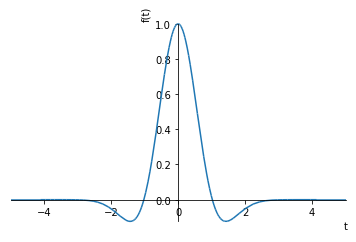

In [4]:
hermite = (1 - p * t**2) * exp(-t**2)
display(hermite)
plot(hermite.subs(par), (t,-5,5));

# Fourier transform Hermite pulse

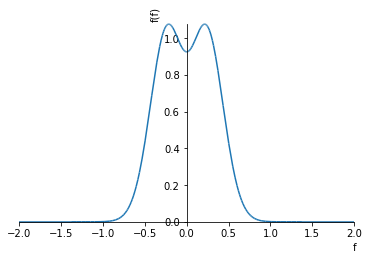

In [5]:
ft_hermite = fft(hermite)
ft_hermite = ft_hermite.simplify()
display(ft_hermite)
plot(ft_hermite.subs(par), (f,-2,2));

# Distortion

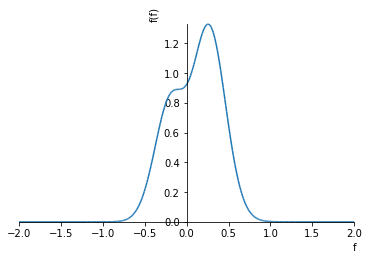

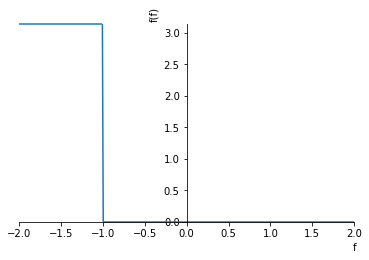

In [6]:
ft_dis = ft_hermite * a * (1 + b*f)
# ft_dis = ft_hermite * a * (1 + b*f + c*f**2)
display(ft_dis)
plot(abs(ft_dis).subs(par), (f,-2,2), adaptive=False, nb_of_points=400);
plot(arg(ft_dis).subs(par), (f,-2,2), adaptive=False, nb_of_points=400);

# Convolution

In [10]:
ft_i_con = (ft_dis + ft_dis.subs(f, -f))/2
ft_q_con = (ft_dis - ft_dis.subs(f, -f))/(2*I)
ft_i_con = ft_i_con.simplify()
ft_q_con = ft_q_con.simplify()
print("FT I:")
display(ft_i_con)
print("FT Q:")
display(ft_q_con)

FT I:


FT Q:


I:


-a*(p*t**2 - 1)*exp(-t**2)
Q:


a*b*t*(-p*t**2 + p + 1)*exp(-t**2)/pi


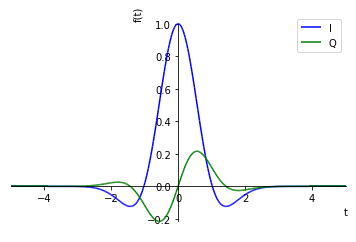

In [11]:
signal_i_con = ifft(ft_i_con)
signal_i_con= signal_i_con.simplify()
signal_q_con = ifft(ft_q_con)
signal_q_con = signal_q_con.simplify()

print("I:")
display(signal_i_con)
print(signal_i_con)
print("Q:")
display(signal_q_con)
print(signal_q_con)
p = plot(signal_i_con.subs(par), signal_q_con.subs(par), (t, -5, 5), 
     adaptive=False, nb_of_points=400, show = False, legend = True);
p[0].line_color = 'blue'
p[0].label = 'I'
p[1].line_color = 'green'
p[1].label = 'Q'
p.show()

# Real and complex part signal

In [12]:
signal_dis = ifft(ft_dis)
signal_dis = signal_dis.simplify()
print("Complex distorted signal:")
display(signal_dis)

print("I:")
display(re(signal_dis).simplify())
print("Q:")
display(im(signal_dis).simplify())

Complex distorted signal:


I:


Q:
